### Hyperparameter Tuning
In machine learning, the components of the model you're running is called a parameter. This is very different than how you use the term in statistics, where a parameter just means a statistic for a population, so the context is important when you encounter the word parameter!

There are parameters that the model will handle itself, based on your training data. There is nothing you can do with these. But some parameters, you can mess around with to help improve your model fit. Parameters that are adjustable are called hyperparameters.

The process of "messing with" hyperparameters is called tuning. Think about a tune-up for your car. You want to fix the little things so that overall, your car runs better and smoother. That's exactly what is going on with tuning your machine learning model as well.

#### parameters that are adjustable are called hyperparameters. the components of a model I'm running is called a parameter; very different from statistics, where it's a statistic for a population. the processing of messing with hyperparameters is called tuning. 

#### Hyperparameters for Decision Trees and Random Forests
There are four hyperparameters for decision trees and random forests that are important:

Maximum depth

#### Maximum Depth
The maximum depth is how far down the "roots" of your tree go. How many nodes do you allow?

#### Root node -> Node -> leaves

#### 2   Number of Estimators
The number of estimators is how many trees that make up a forest. Generally, the more trees you have, the better your accuracy will be, but more trees also increases computation time.

#### 3 Maximum Number of Features
A feature is the decision points, or branches, on the tree. You can set a limit as to how many are allowed.



#### 4 Minimum Number of Samples
The minimum number of samples is how many data points are being sorted at each feature. This has a minimum instead of a maximum.

#### minimum number of samples for a leaf aka

#### Hyperparameter Tuning in Python
Now that you know a little bit about hyperparameter tuning, you'll go ahead and do it in Python! Huzzah!

Load in Libraries
In addition to everything else you used for random forests, you'll also need the following library:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#also the following for a random forest
from sklearn.model_selection import RandomizedSearchCV

In [20]:
iris = sns.load_dataset('iris')

In [21]:
x = iris.drop('species', axis=1)
y = iris['species']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [23]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [24]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### Number of Estimators
The first thing you want to do is determine how many trees you should be using, which is the number of estimators. The code below will help you find the best number of estimators based on the accuracy of the model. Remember that an accuracy of 1 is the highest you can get, so the closer you get to one, the better.

You can create an array that contains the most likely number of estimators, which is what is shown in the first line. While you could put any numbers in this array, these typically get used frequently in ML. Then you'll create an empty list named results that will end up filled using a for loop!

And lastly, on to the for loop itself! This iterates over your n_estimators_array and creates a random forest for each, prints out the accuracy for each, and finally adds it to your results list. So you don't have to test everything manually! The very last line in the for loop prints out each result as it becomes available. Depending on how fast your computer is, this code may take a minute (you are doing 11 random forests, after all!) and you can see the results come up in real time. Pretty cool!

In [25]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9111111111111111
4 : 0.9555555555555556
5 : 0.9333333333333333
8 : 0.9555555555555556
10 : 0.9777777777777777
20 : 0.9555555555555556
50 : 0.9555555555555556
75 : 0.9555555555555556
100 : 0.9555555555555556
250 : 0.9555555555555556
500 : 0.9555555555555556


#### make sure to import accuracy_score from sklearn.metrics 

#### So it looks like the best accuracy arises when you use only 10 trees instead of the standard 500! Good to know.

If you wanted a visual representation of this, that can be done too with your good old plt() function!

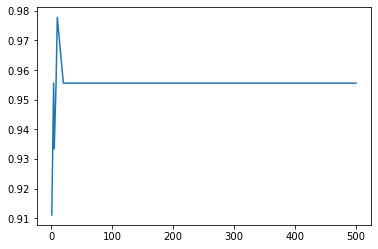

In [26]:
plt.plot(n_estimators_array, results)

#### You really get a sense from this graph that things have completely stagnated before 100 trees, so it certainly is a waste of processing power to request 500!

Tuning the Remaining Three
If you're wondering if there is an easier way to find the best hyperparameter values without having to go through each, then guess what? There is! You can automate it and find em' all in one whack with the RandomizedSearchCV library. Although you'll be doing this just with random forests right now, this library will work with any algorithm in the sklearn library! If you're not convinced yet that a randomized grid search is the bee's knees, then to sweeten the pot, they've thrown in cross-validation for the accuracy calculations as well!

Below you are creating lists with all the hyperparameter values you want to trial. There is one for each of the remaining three features, named: max_features, max_depth, and min_samples_leaf. Then, you'll create a dictionary with the hyperparameter names as the keys and the list variables as the values. This is called a grid and is aptly named random_grid.

#### to repeat - RandomizedSearchCV library. Although you'll be doing this just with random forests right now, this library will work with any algorithm in the sklearn library! If you're not convinced yet that a randomized grid search is the, then to sweeten the pot, they've thrown in cross-validation for the accuracy calculations as well

In [27]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


#### So nothing has actually happened yet - but you're prepared for the next move, which is to initialize one random forest for every one of those hyperparameters in the random_grid. Since you know that you only want ten trees, the first line sets up a random forest model with that.

The next line of code gives you a random search of the random_grid you created using the function RandomizedSearchCV(). The arguments for that function include the estimator=, which is what you've named your latest iteration of the random forest with only ten estimators, the param_distributions= argument, which is where you plug in the random_grid dictionary, n_iter=, which is the number of iterations, or times to complete the random forest, and lastly, the cv= argument, which allows you to choose how many folds you'd like in your cross validation. The random_state= argument is not required to run code, but including it means that your results should be the same as those in the lesson.

In [28]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

#### With that created, it's time to fit!

In [29]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### It basically just tells you what it did, which is not particularly helpful. What would be helpful is knowing which hyperparameter produced the best accuracy. But that isn't possible, is it?

It is! Try this line of code out!

In [30]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50}

#### This means that the model with the best accuracy has at least 4 samples per leaf, leaves the max features setting on auto, and has a maximum depth of 30 decision points. Pretty nifty! Now all you need to do is run one last random forest that actually has those parameters! This is relatively plug-and-play here, since in your random grid search code, you used approximately the same names.

#### note my output says to have a maximum depth of 50 - not 30

In [31]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, max_features="auto", max_depth=30)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=10)

#### running the code above just tells you the details of the model. But if you want the details (and of course you want the details!) you can use the same prediction and classification report info as before, but with your new and improved model:

In [32]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### looks good. overall accuracy is 95% weighted. 

#### you plug in the random_grid dictionary after param_distributions
#the very first thing you want to do when hyperparameter tuning is find the number of estimators. 

#### Feature Importance
When you have more than one x variable in a machine learning model, how do you know which one of them is important? Are they all equally important? Do some help predict y more than others? If you were doing regression, you could find out by looking at the individual p values related to the variable, or you could do a stepwise regression of some sort to tease out how much each matters. But these options don't exist for machine learning. However, something called feature importance does.

Each variable in machine learning can also be referred to as a feature. So, determining the feature importance just means that you can figure out which variable makes more difference to the prediction of the y.

#### Feature Importance in Python
It's a pretty quick and easy line of code to get feature importance! They are outputs of your model, and so you just need to call them in a format that is useful. You'll create a new variable called feature_importances that is formatted as a pandas series, using the function pd.Series(). Then, you can call forest.feature_importances_, which by default is created when you run forest. Lastly, for readability, you can index it with the argument index= and put in x.columns so that the name of the column names in your dataset show on the left.

In [33]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

sepal_length    0.001153
sepal_width     0.040525
petal_length    0.408658
petal_width     0.549664
dtype: float64

#### The bigger, the better for feature importance. Wouldn't it be nice to see each of them in order of feature importance, rather than in column order? Well, that can be arranged! The sort_values() function will sort them. The inplace=True argument, like always, makes this change permanent, and ascending=False means that this goes from largest to smallest, which is exactly what you'd like to see! Then all you need to do is print it out 

In [34]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

petal_width     0.549664
petal_length    0.408658
sepal_width     0.040525
sepal_length    0.001153
dtype: float64


#### If you're someone visual, you can also graph this. A simple bar graph will do if you aren't showing it off to anyone:

<AxesSubplot:>

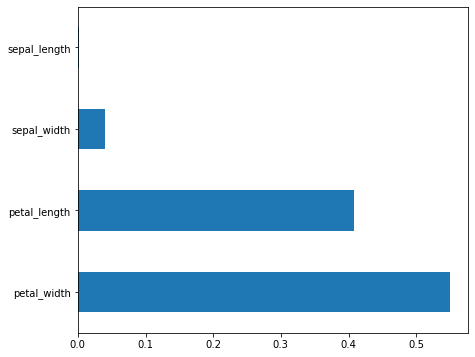

In [35]:
feature_importances.plot(kind='barh', figsize=(7,6))